In [106]:
import pandas as pd
from matplotlib import rcParams, rc
import matplotlib
import matplotlib.font_manager as font_manager
import matplotlib.ticker as mticker

# Add every font at the specified location
font_dir = ['.']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
    
rcParams['font.family'] = 'Verdana'
rcParams['figure.figsize'] = [11, 7]
rcParams['figure.dpi'] = 400 # 200 e.g. is really fine, but slower
import matplotlib.pyplot as plt

In [2]:
fiftykb_data = pd.read_csv("50KB_one_invocation.csv")
fiftykb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTION
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,4999.50000,0.029880,0.047178,0.010128,0.007668
std,2886.89568,2886.89568,0.006816,0.009331,0.002873,0.002398
min,0.00000,0.00000,0.022113,0.036609,0.007006,0.005328
25%,2499.75000,2499.75000,0.025163,0.041033,0.008502,0.006493
50%,4999.50000,4999.50000,0.028778,0.045415,0.009766,0.007322
75%,7499.25000,7499.25000,0.031848,0.049398,0.010785,0.008075
max,9999.00000,9999.00000,0.085626,0.149661,0.065313,0.037976


In [3]:
fivehundredkb_data = pd.read_csv("500KB_one_invocation.csv")
fivehundredkb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTION
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,4999.50000,0.141793,0.049730,0.011389,0.009092
std,2886.89568,2886.89568,0.026287,0.010019,0.003352,0.002622
min,0.00000,0.00000,0.105155,0.038257,0.007875,0.006428
25%,2499.75000,2499.75000,0.125981,0.043752,0.009780,0.008028
50%,4999.50000,4999.50000,0.133887,0.046793,0.010623,0.008656
75%,7499.25000,7499.25000,0.147651,0.051202,0.011654,0.009276
max,9999.00000,9999.00000,0.444248,0.129521,0.046447,0.043862


In [4]:
fivemb_data = pd.read_csv("5MB_one_invocation.csv")
fivemb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTION
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,4999.50000,6.309824,0.061861,0.015841,0.010686
std,2886.89568,2886.89568,1.490525,0.076296,0.018543,0.003090
min,0.00000,0.00000,3.169262,0.040535,0.009695,0.007233
25%,2499.75000,2499.75000,6.565401,0.052467,0.013090,0.009427
50%,4999.50000,4999.50000,6.755522,0.056209,0.014232,0.009991
75%,7499.25000,7499.25000,7.150696,0.066313,0.016700,0.010766
max,9999.00000,9999.00000,20.003117,7.572637,1.788850,0.056271


In [5]:
fiftymb_data = pd.read_csv("50MB_one_invocation.csv")
fiftymb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTION
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,4999.50000,90.039465,0.062814,0.018386,0.010396
std,2886.89568,2886.89568,10.169043,0.010953,0.005076,0.002741
min,0.00000,0.00000,83.549474,0.051718,0.013346,0.008398
25%,2499.75000,2499.75000,85.950517,0.056688,0.015920,0.009528
50%,4999.50000,4999.50000,87.612071,0.058836,0.017045,0.009785
75%,7499.25000,7499.25000,91.861689,0.064674,0.019017,0.010129
max,9999.00000,9999.00000,265.114891,0.289151,0.153242,0.080012


In [6]:
fiftykb_mean = fiftykb_data[["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "EVENT_SERIALIZATION_DURATION", "STATE_SERIALIZATION_DURATION"]].mean().to_frame(name="50KB")
fivehundredkb_mean = fivehundredkb_data[["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "EVENT_SERIALIZATION_DURATION", "STATE_SERIALIZATION_DURATION"]].mean().to_frame(name="500KB")
fivemb_mean = fivemb_data[["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "EVENT_SERIALIZATION_DURATION", "STATE_SERIALIZATION_DURATION"]].mean().to_frame(name="5MB")
fiftymb_mean = fiftymb_data[["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "EVENT_SERIALIZATION_DURATION", "STATE_SERIALIZATION_DURATION"]].mean().to_frame(name="50MB")

overhead_mean = pd.concat([fiftykb_mean, fivehundredkb_mean, fivemb_mean, fiftymb_mean], axis=1)
print(overhead_mean)

                                  50KB     500KB       5MB       50MB
ACTOR_CONSTRUCTION            0.007668  0.009092  0.010686   0.010396
ROUTING_DURATION              0.010128  0.011389  0.015841   0.018386
EVENT_SERIALIZATION_DURATION  0.047178  0.049730  0.061861   0.062814
STATE_SERIALIZATION_DURATION  0.029880  0.141793  6.309824  90.039465


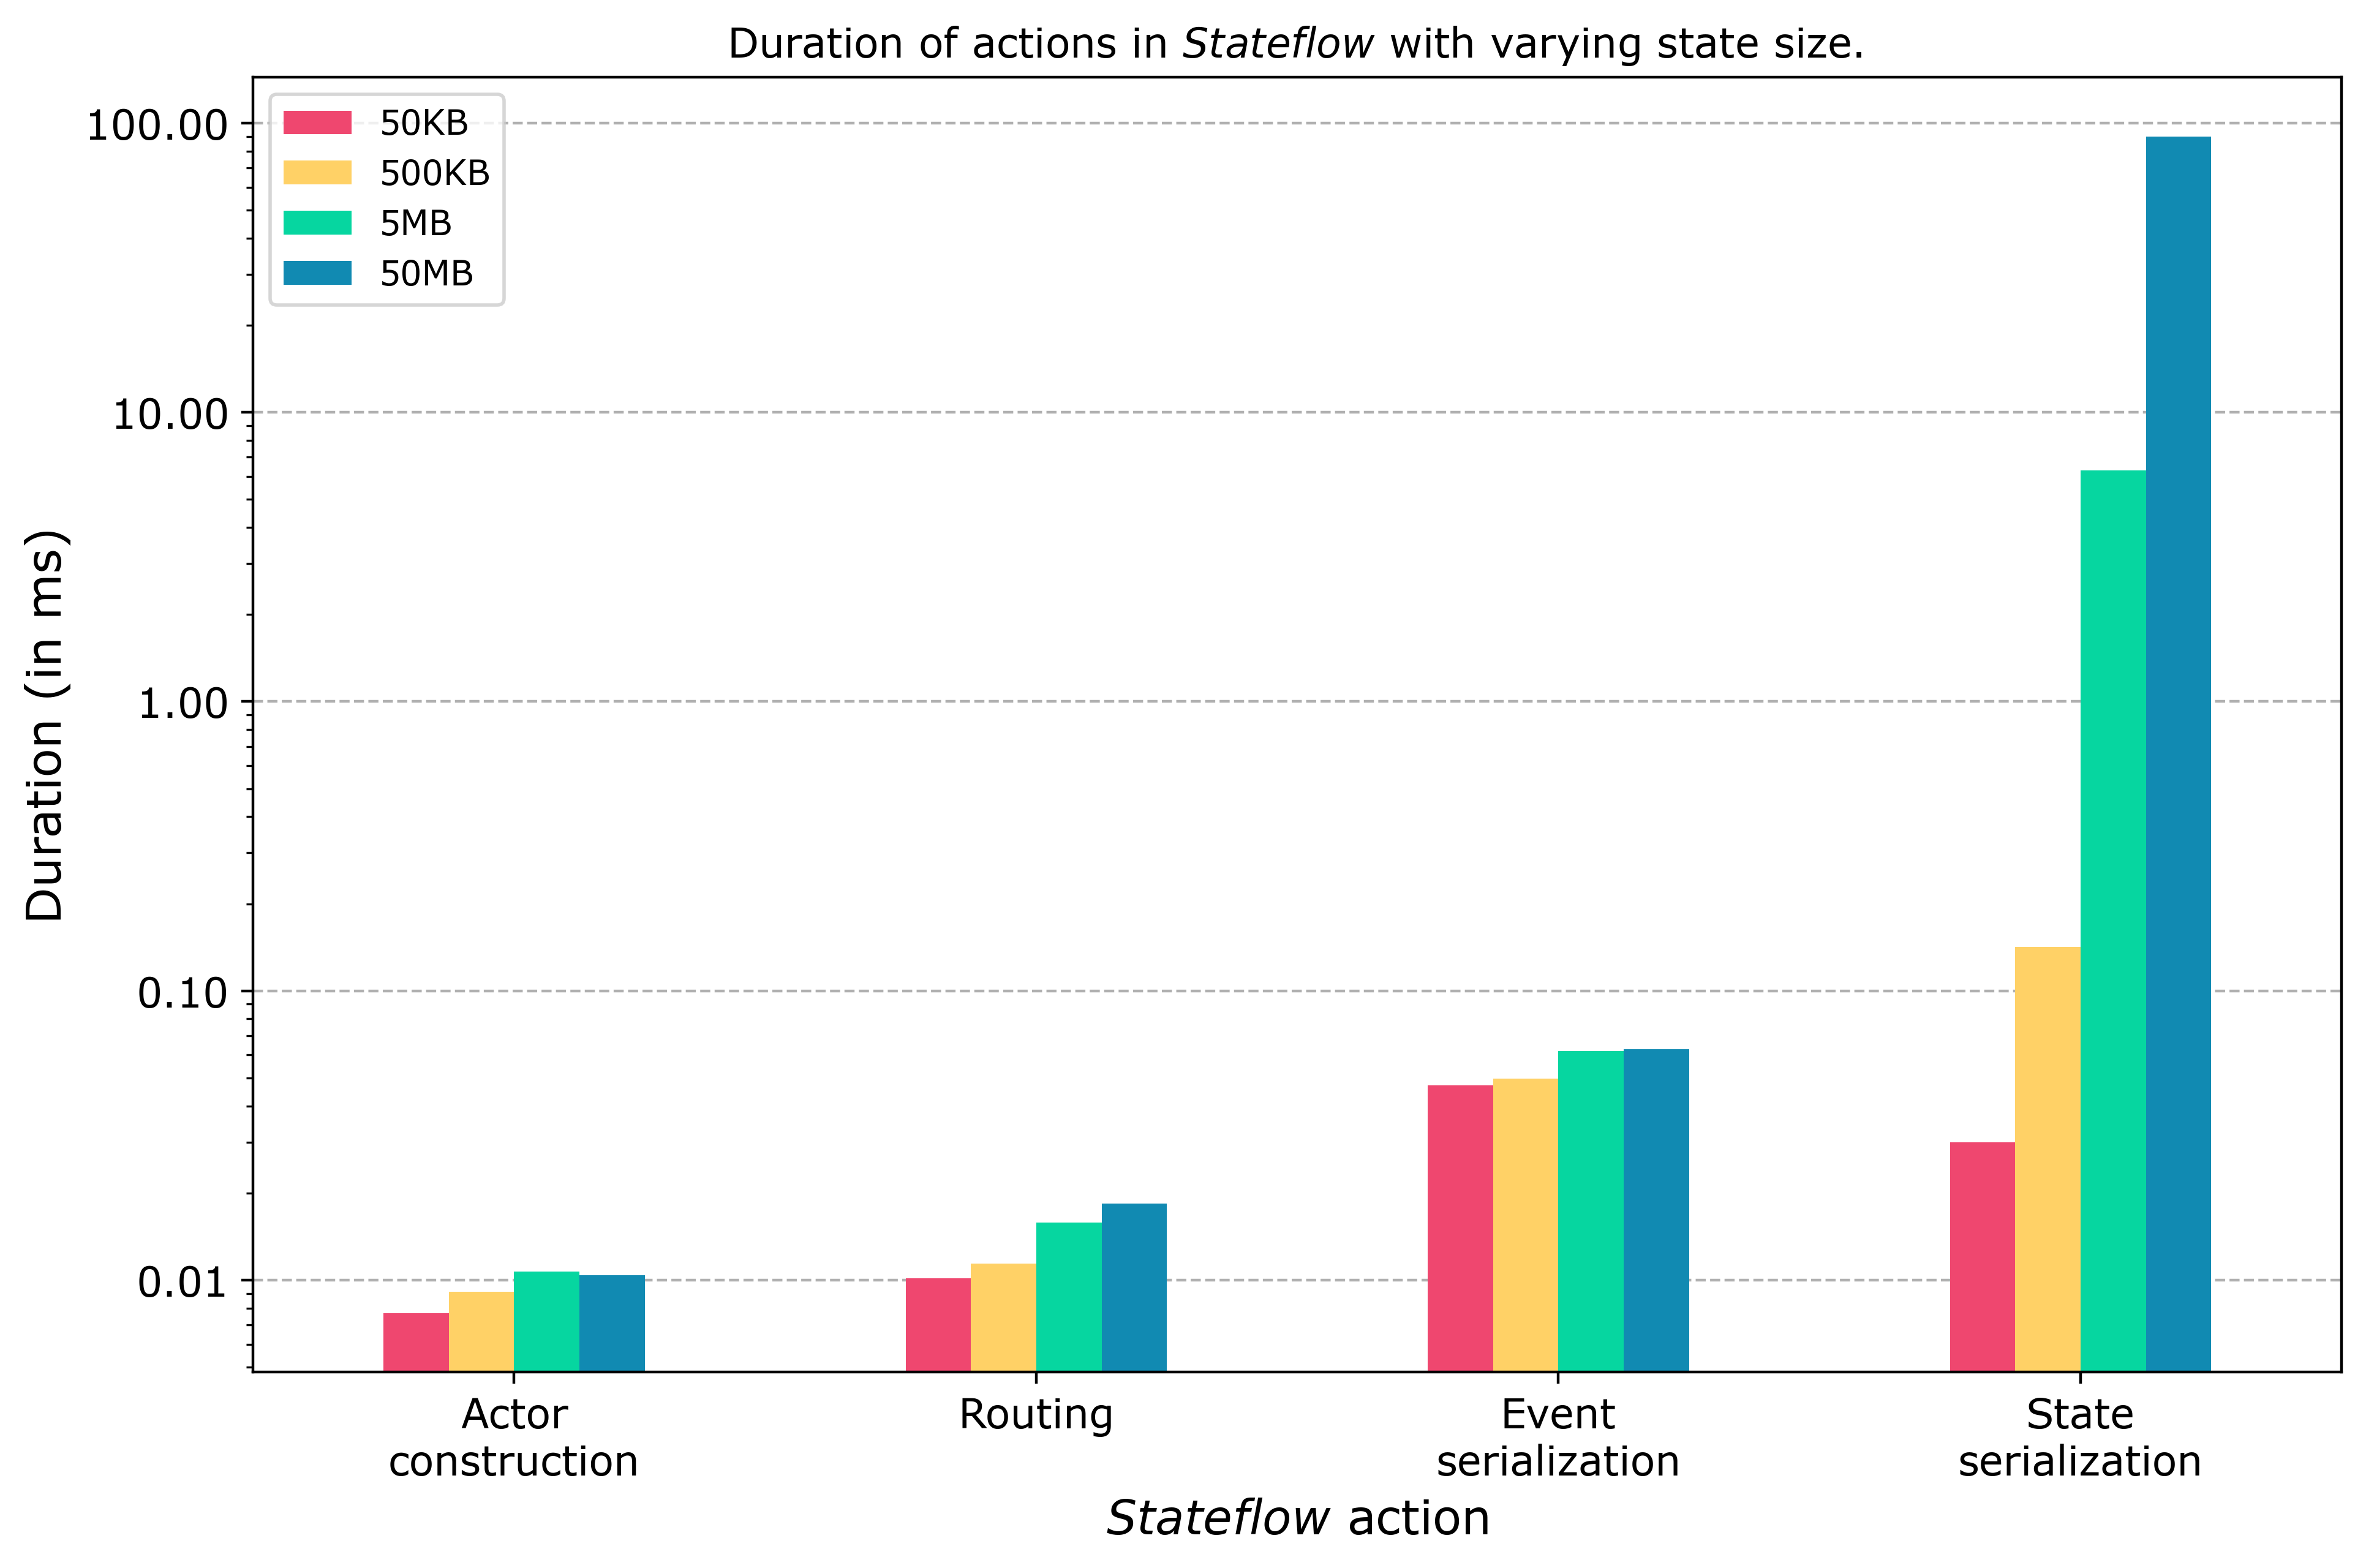

In [114]:
ax = overhead_mean.plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], rot=0, fontsize=12)
ax.set_axisbelow(True)
plt.grid(axis="y", linestyle="--")
ax.set_yscale('log')
ax.set_ylabel("Duration (in ms)", fontsize=14)
ax.set_xlabel(r"$Stateflow$ " + "action", fontsize=14)
ax.set_xticklabels(["Actor\nconstruction", "Routing", "Event\nserialization", "State\nserialization"])
ax.set_title(r"Duration of actions in $Stateflow$ with varying state size. ")
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2f'))
plt.show()

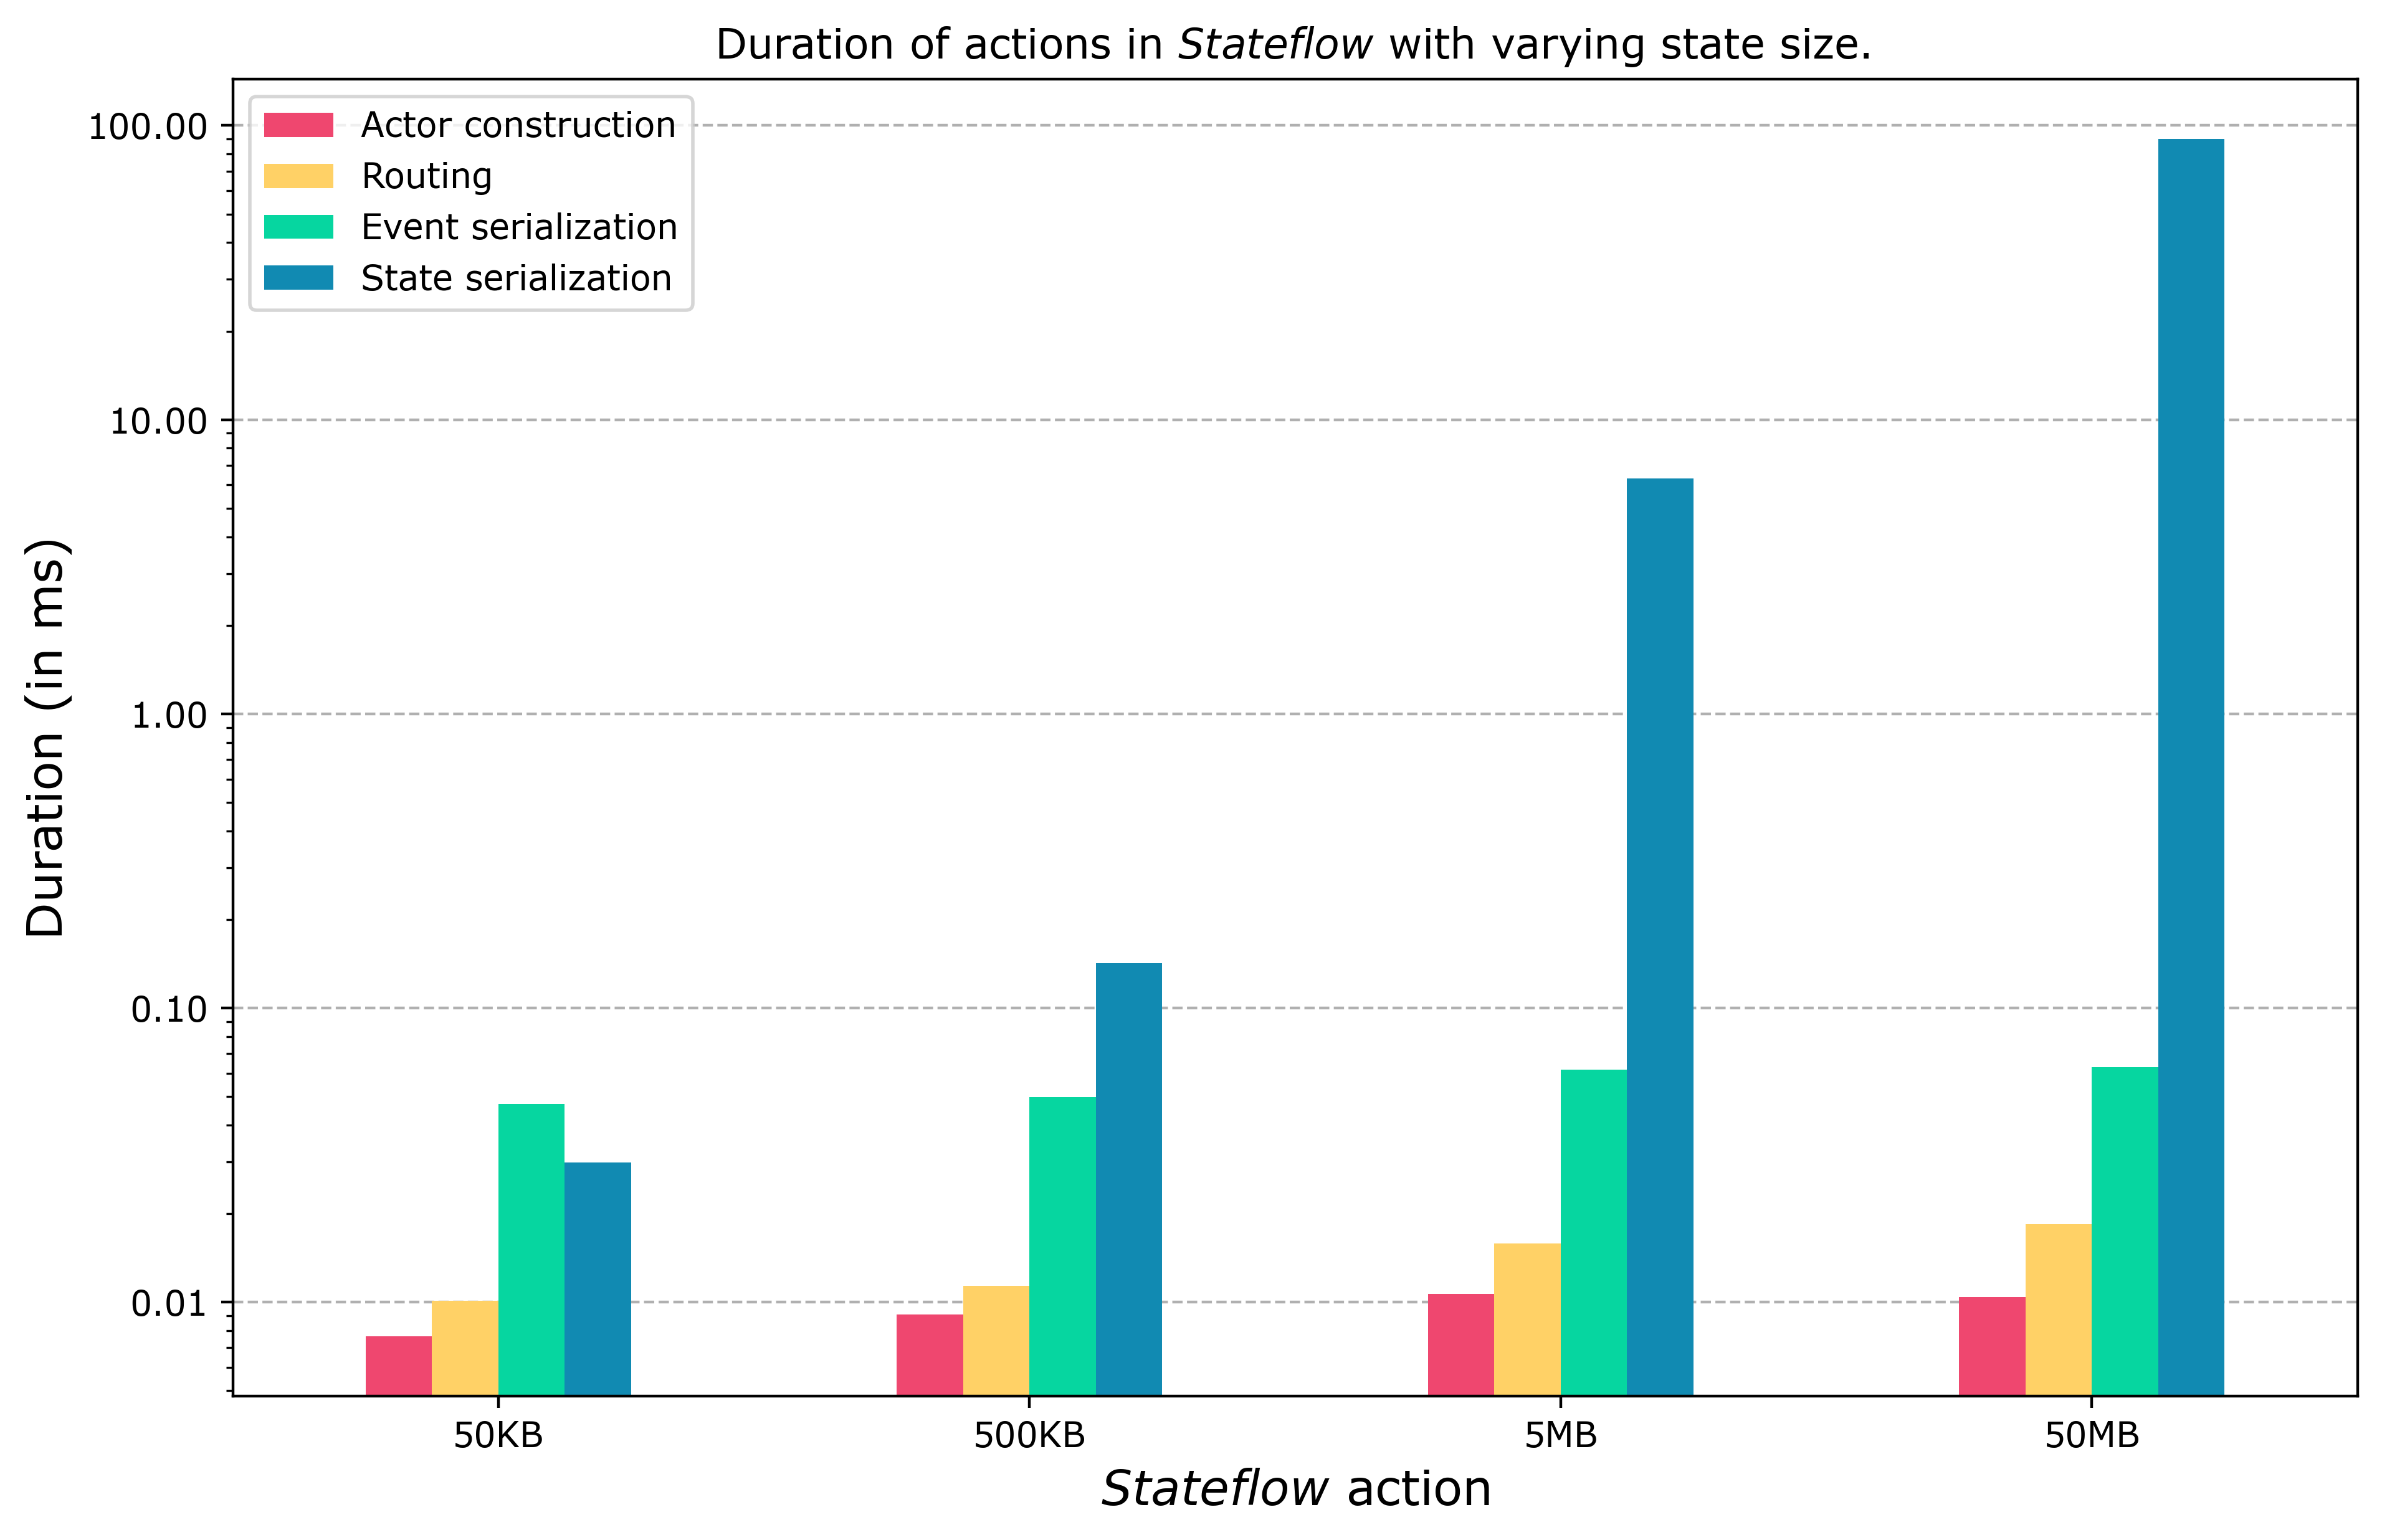

In [120]:
new_overhead = overhead_mean.rename({"ACTOR_CONSTRUCTION": "Actor construction", "ROUTING_DURATION": "Routing", "EVENT_SERIALIZATION_DURATION": "Event serialization", "STATE_SERIALIZATION_DURATION": "State serialization"}).transpose()
ax = new_overhead.plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], rot=0)
ax.set_axisbelow(True)
plt.grid(axis="y", linestyle="--")
ax.set_yscale('log')
ax.set_ylabel("Duration (in ms)", fontsize=14)
ax.set_xlabel(r"$Stateflow$ " + "action", fontsize=14)
ax.set_title(r"Duration of actions in $Stateflow$ with varying state size. ")
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2f'))

plt.show()

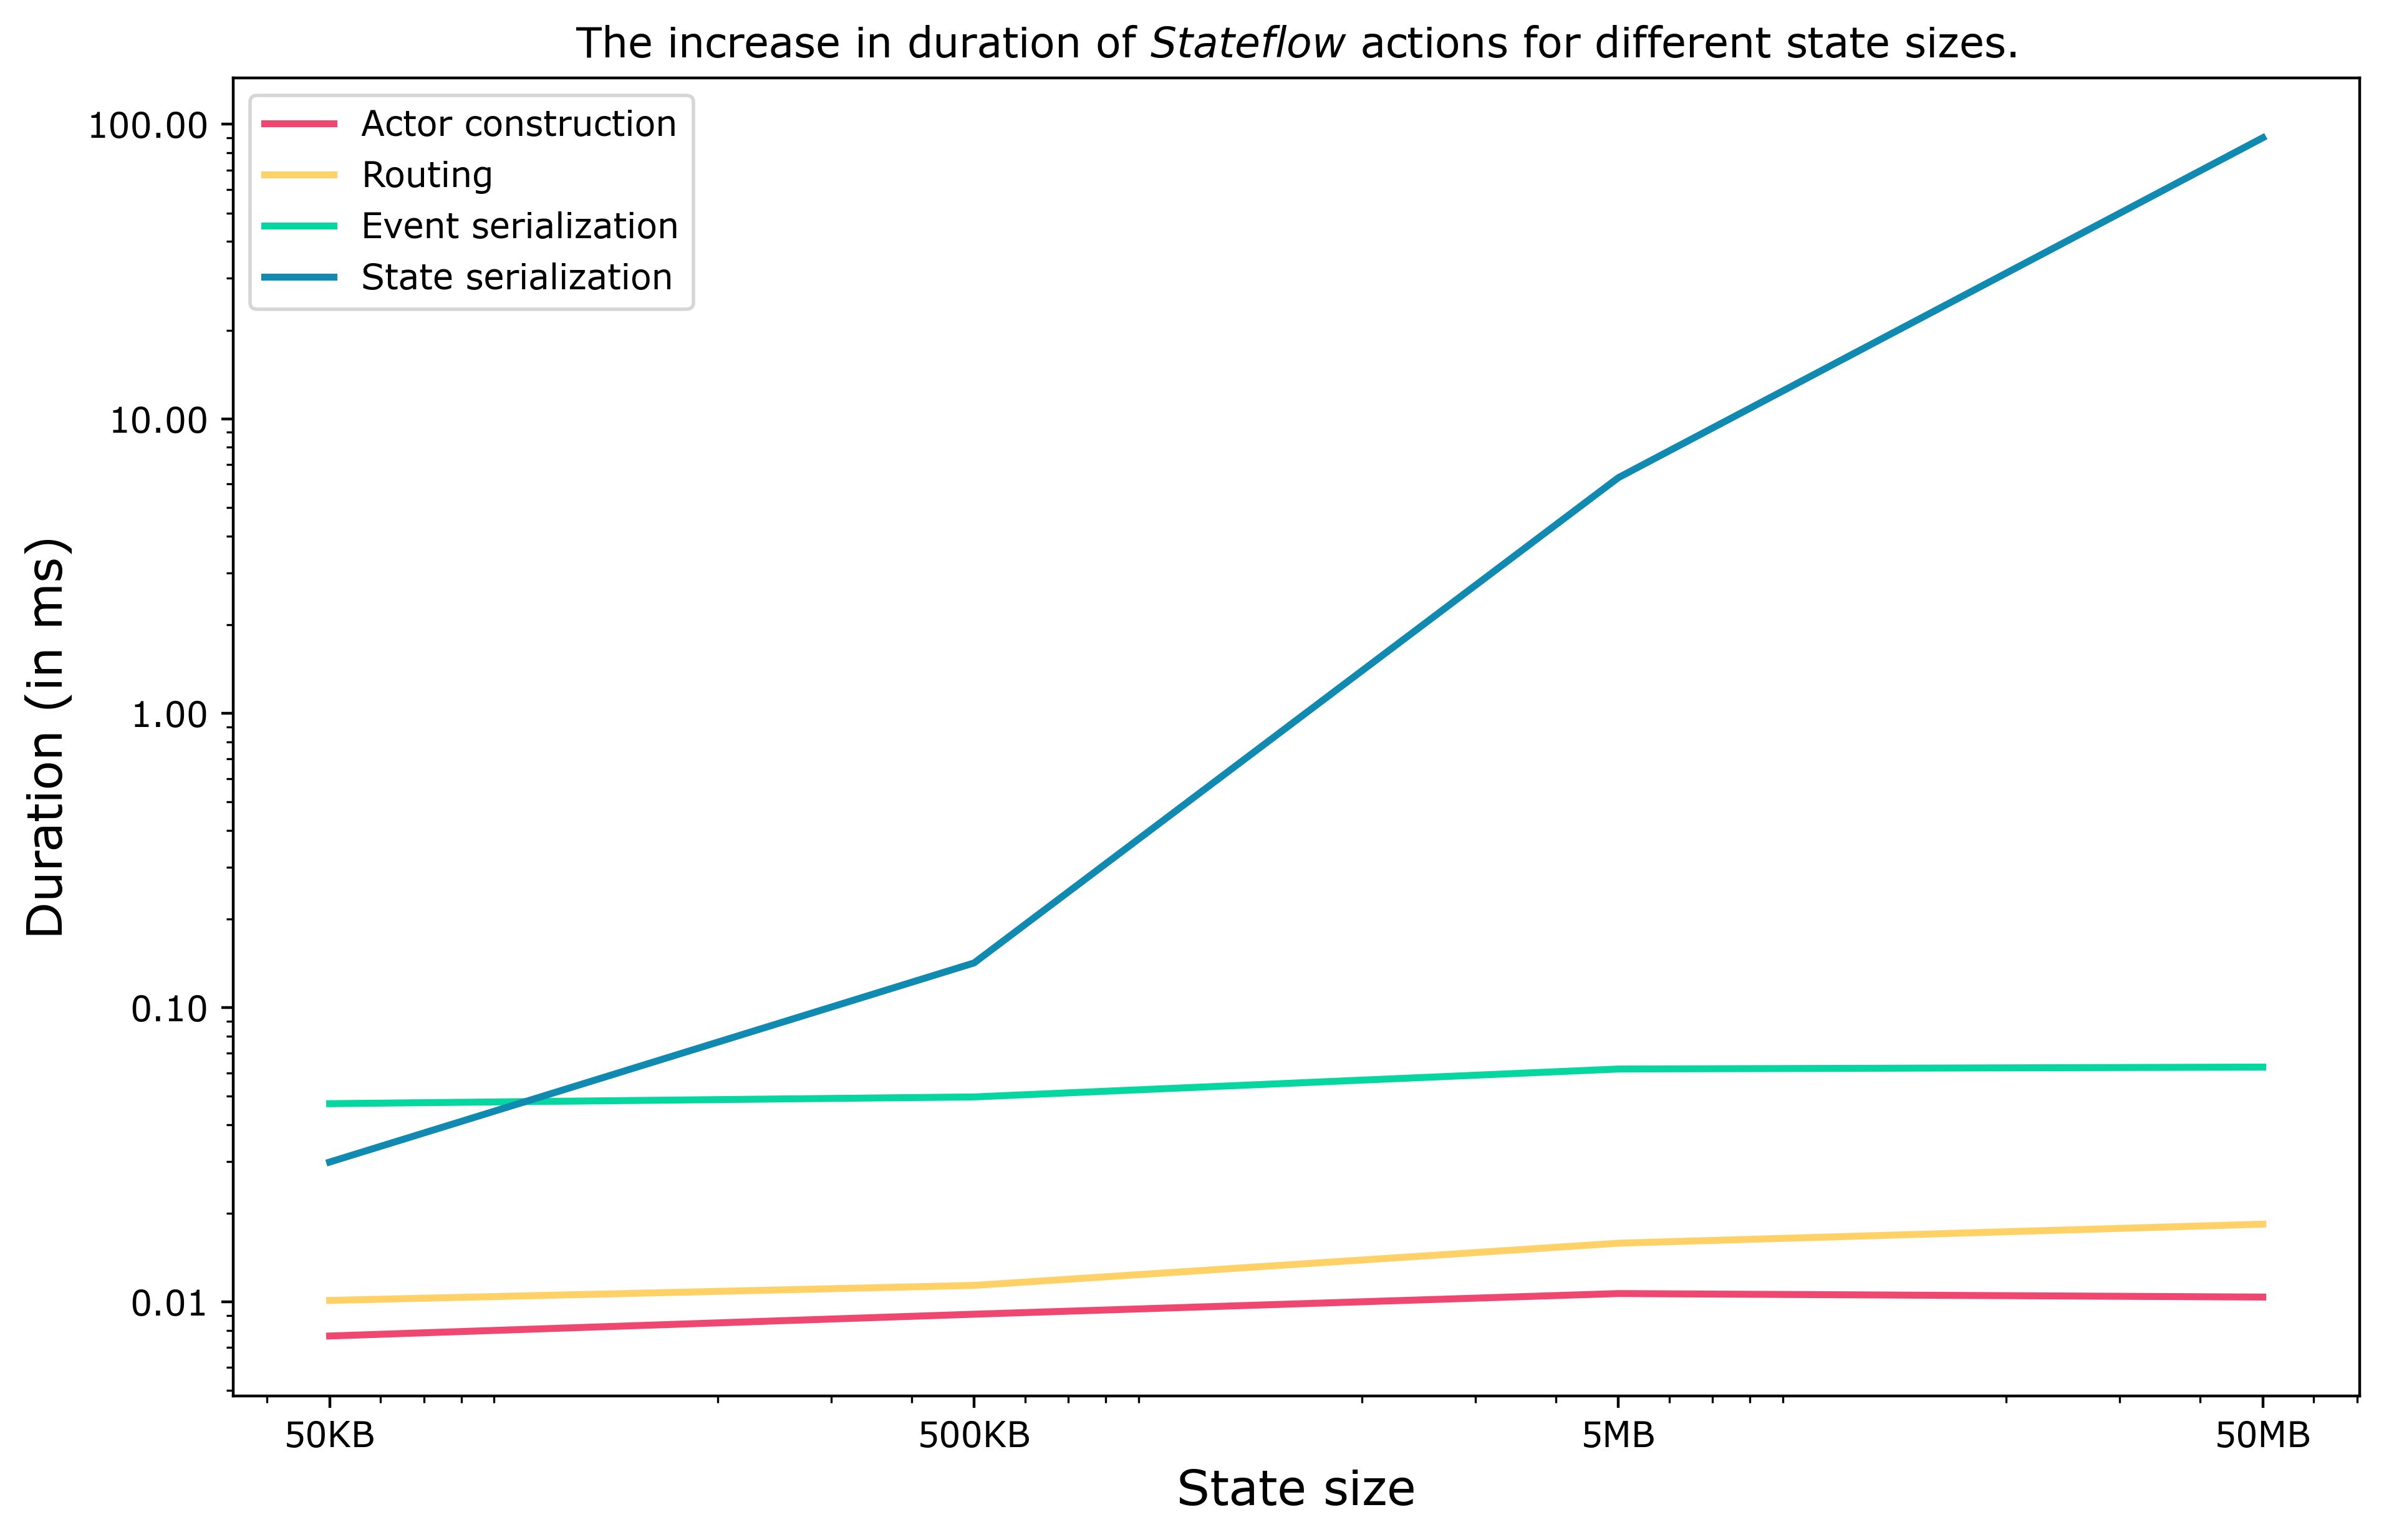

In [119]:
actor = overhead_mean.loc["ACTOR_CONSTRUCTION"]
route = overhead_mean.loc["ROUTING_DURATION"]
event = overhead_mean.loc["EVENT_SERIALIZATION_DURATION"]
state = overhead_mean.loc["STATE_SERIALIZATION_DURATION"]

x = [50, 500, 5000, 50000]
plt.plot(x, actor, color="#ef476f", label="Actor construction", linewidth=2)
plt.plot(x, route, color="#ffd166", label="Routing", linewidth=2)
plt.plot(x, event, color="#06d6a0", label="Event serialization", linewidth=2)
plt.plot(x, state, color="#118ab2", label="State serialization", linewidth=2)
ax = plt.gca()

plt.yscale('log')
plt.xscale('log')
plt.xticks(x, ["50KB", "500KB", "5MB", "50MB"])
plt.ylabel("Duration (in ms)",fontsize=14)
plt.xlabel("State size", fontsize=14)
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2f'))

plt.legend()
plt.title(r"The increase in duration of $Stateflow$ actions for different state sizes.")
plt.show()
